In [645]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression # Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.metrics import mean_squared_error, r2_score # error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.linear_model import Ridge

In [646]:
data = pd.read_csv('datos_limpios.csv') #Lectura de los datos 

Usamos los datos limpios que hemos hecho 


In [647]:
data

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class
0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0
1,0.0,2.0,2.0,3.0,65000.0,4,5,0.0
2,0.0,1.0,36.0,7.0,60000.0,4,5,0.0
3,1.0,1.0,25.0,2.0,55000.0,4,5,0.0
4,0.0,2.0,31.0,12.0,120000.0,4,1,0.0
...,...,...,...,...,...,...,...,...
6342,0.0,3.0,7.0,20.0,200000.0,3,7,0.0
6343,1.0,0.0,36.0,3.0,50000.0,0,2,0.0
6344,0.0,1.0,9.0,4.0,55000.0,2,4,0.0
6345,1.0,2.0,28.0,14.0,140000.0,2,6,0.0


Primero haremos regresion lineal para una variable, lo realizaremos las caracteristicas 'Years of Experiene' y 'Race' ya que una tiene mucha correlacion con la caracteristica a medir y la otra muy poca.

In [648]:
x1 = data['Years of Experience']
x2 = data['Race']
y = data['Salary']

Dividimos los datos en datos de prueba y datos de entreanamiento. 

In [649]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state=0)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.25, random_state=0)

In [650]:
x1_train, x1_test = np.array(x1_train).reshape(-1, 1), np.array(x1_test).reshape(-1, 1)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)
x2_train, x2_test = np.array(x2_train).reshape(-1, 1), np.array(x2_test).reshape(-1, 1)

En la siguiente celda creamos dos funciones, una que entrene y nos de el resultado de un array de 1 dimension (tiene grafica) y otra en general que solo nos da los coeficientes

In [651]:
def show_result_1d(x_train, x_test, y_train, y_test, char = 'Caracteristicas'):
    #Almacenamos el modelo en una variable
    model = LinearRegression()
    # Entrenamos el dataset
    model.fit(x_train, y_train)
    # Prediccion obtenida
    y_pred = model.predict(x_test)
    #Coeficientes
    print('m = ' + str(model.coef_) + ', b = ' + str(model.intercept_)) 
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # Graficamos
    #Grafica del conjunto de entrenamiento
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(x_train, y_train, color="red",label='Sample data')
    plt.plot(x_train, model.predict(x_train), color="blue",label='Regression model')
    plt.title("Sueldo en relación con los años del conjunto de entrenamiento")
    plt.xlabel(char)
    plt.ylabel("Salarios")
    # Grafica del conjunto de prueba
    plt.subplot(1,2,2)
    plt.scatter(x_test, y_test, color="red")
    plt.plot(x_train, model.predict(x_train), color="blue")
    plt.title("Sueldo en relación con los años del conjunto de prueba")
    plt.xlabel(char)
    plt.ylabel("Salarios")

def show_result(x_train, x_test, y_train, y_test):
    #Almacenamos el modelo en una variable
    model = LinearRegression()
    # Entrenamos el dataset
    model.fit(x_train, y_train)
    # Prediccion obtenida
    y_pred = model.predict(x_test)
    #Coeficientes
    print('m = ' + str(model.coef_) + ', b = ' + str(model.intercept_)) 
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    print('score: ', model.score(x_test, y_test))


m = [[7145.98656955]], b = [59189.50351599]
Mean squared error: 964193832.24
Coefficient of determination: 0.66


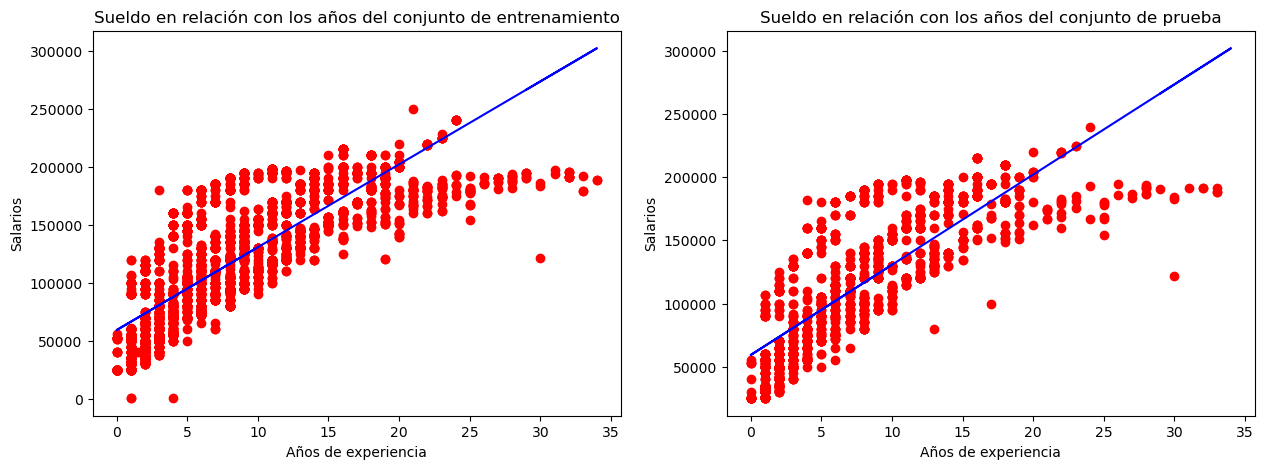

In [652]:
show_result_1d(x1_train, x1_test, y_train, y_test, 'Años de experiencia' )

m = [[112.35206289]], b = [116287.36315701]
Mean squared error: 2804965732.39
Coefficient of determination: 0.00


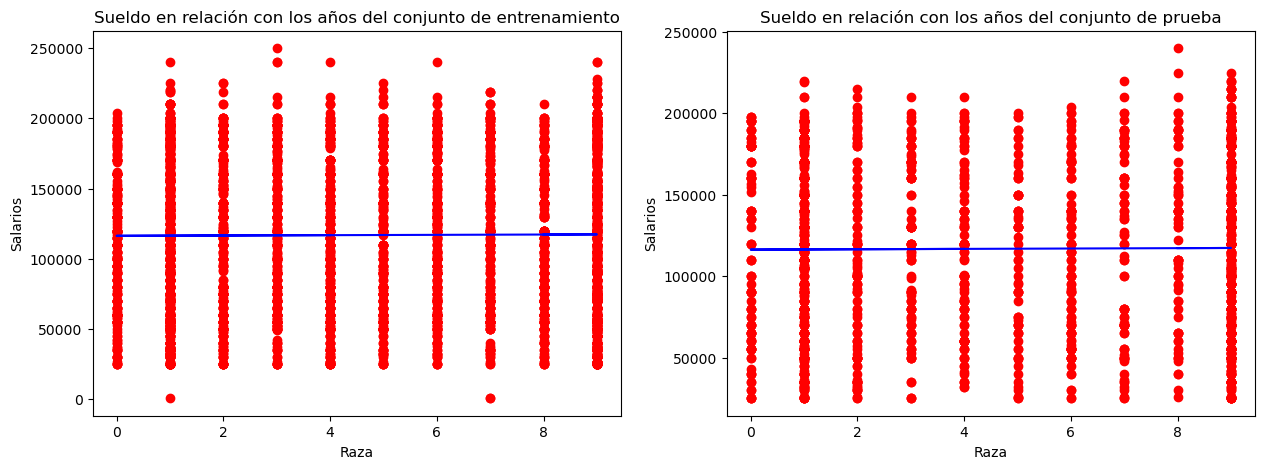

In [653]:
show_result_1d(x2_train, x2_test, y_train, y_test, 'Raza')


## Regresion lineal multidimensional

In [654]:
X = data.drop(['Salary'], axis=1)
Y = data['Salary']
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)


In [655]:
show_result(X_train, X_test, Y_train, Y_test)

m = [ 5152.72937402 11977.27430711  -258.27359758  5747.64497043
  -551.9859436    -84.95747969 11949.63192934], b = 55591.21275731671
Mean squared error: 847328972.73
Coefficient of determination: 0.70
score:  0.6990243613928663


## Creacion de datos sinteticos (No tiene utilidad en este dataset)

In [664]:
'''def ds(model, char, X, Y):
    Z1 = pd.concat([X, Y], axis=1)
    U = Z1.drop([char], axis = 1)
    V = Z1[char]
    U_os, V_os = model.fit_resample(U, V)
    Z2 = pd.concat([U_os, V_os], axis=1)
    U = Z2.drop(['Salary'], axis=1)
    V = Z2['Salary']
    U = U[['Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race']]
    return U, V'''


"def ds(model, char, X, Y):\n    Z1 = pd.concat([X, Y], axis=1)\n    U = Z1.drop([char], axis = 1)\n    V = Z1[char]\n    U_os, V_os = model.fit_resample(U, V)\n    Z2 = pd.concat([U_os, V_os], axis=1)\n    U = Z2.drop(['Salary'], axis=1)\n    V = Z2['Salary']\n    U = U[['Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race']]\n    return U, V"

In [665]:
#model = RandomOverSampler()
#U, V = ds(model, 'Race', X_train, Y_train)
#U, V = ds(model, 'Job Title', U, V)
#U, V = ds(model, 'Education Level', U2, V2)
#show_result(U, X_test, V, Y_test) 

# Modificamos el dataset
Haremos que cada clasificacion de las caracteristicas 'Country', 'Race' y 'Job Title' sea una nueva columna, esto para que no haya sesgo al elegir su valor numerico.

In [658]:
data1 = data.copy()
data1

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class
0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0
1,0.0,2.0,2.0,3.0,65000.0,4,5,0.0
2,0.0,1.0,36.0,7.0,60000.0,4,5,0.0
3,1.0,1.0,25.0,2.0,55000.0,4,5,0.0
4,0.0,2.0,31.0,12.0,120000.0,4,1,0.0
...,...,...,...,...,...,...,...,...
6342,0.0,3.0,7.0,20.0,200000.0,3,7,0.0
6343,1.0,0.0,36.0,3.0,50000.0,0,2,0.0
6344,0.0,1.0,9.0,4.0,55000.0,2,4,0.0
6345,1.0,2.0,28.0,14.0,140000.0,2,6,0.0


In [661]:
data2 = pd.concat([data1, pd.get_dummies(data1['Race'], dtype = int, prefix= 'Race')], axis = 1)
data3 = pd.concat([data2, pd.get_dummies(data2['Job Title'], dtype = int, prefix= 'Job')], axis = 1)
data4 = pd.concat([data3, pd.get_dummies(data3['Country'], dtype = int, prefix= 'Country')], axis = 1)
data4

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Race_0,Race_1,...,Job_47.0,Job_48.0,Job_49.0,Job_50.0,Job_51.0,Country_0,Country_1,Country_2,Country_3,Country_4
0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,2.0,2.0,3.0,65000.0,4,5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1.0,36.0,7.0,60000.0,4,5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,25.0,2.0,55000.0,4,5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,2.0,31.0,12.0,120000.0,4,1,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,0.0,3.0,7.0,20.0,200000.0,3,7,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
6343,1.0,0.0,36.0,3.0,50000.0,0,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
6344,0.0,1.0,9.0,4.0,55000.0,2,4,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6345,1.0,2.0,28.0,14.0,140000.0,2,6,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [662]:
X = data3.drop(['Salary', 'Race', 'Job Title', 'Country'], axis=1)
Y = data3['Salary']
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [663]:
show_result(X_train, X_test, Y_train, Y_test)

m = [-8.66260800e+00  5.22538917e+03  5.40115017e+03  8.12244875e+14
 -3.33503071e+14 -3.33503071e+14 -3.33503071e+14 -3.33503071e+14
 -3.33503071e+14 -3.33503071e+14 -3.33503071e+14 -3.33503071e+14
 -3.33503071e+14 -3.33503071e+14 -6.20234204e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14  1.92010671e+14  1.92010671e+14
  1.92010671e+14  1.92010671e+14  1.92010671e+14  1.92010671e+14
  1.92010671e+14  1.92010671e+14  1.92010671e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14
 -6.20234204e+14 -6.20234204e+14 -6.20234204e+14 -1.43247908e+15
 -1.43247908e+15 -1.43247908e+15 -1.43247908e+15 -1.43247908e+15
 -1.43247908e+15 -1.4